# Exercises XP Ninja: W2_D4

## What You’ll Learn

- Advanced visualization techniques for multi-dimensional and hierarchical data.
- Building interactive Python scripts for dynamic plot generation.
- Applying machine learning models for prediction and analysis.
- Implementing clustering techniques to identify patterns in data.
- Using libraries such as Matplotlib, Seaborn, and Scikit-learn to enhance data exploration and visualization.

## What You Will Create

- Annotated line graphs for real-world temperature datasets.
- Interactive scripts for dynamic subplot configurations.
- Multi-dimensional plots for wine data analysis.
- Predictive models to estimate wine prices.
- Clustering models to group wines based on multiple features.

---

## Exercise 1: Annotated Line Graph for Temperature Records

**Objective:** Design a line graph illustrating temperature fluctuations in a specific city.

**Tasks:**
1. Use a real-world dataset of temperature records (`city_temperature.csv`).
2. Highlight extreme temperature events with annotations.
3. Add titles, labels, and legends to enhance clarity.
4. Explain the insights gained from the visualization.

---

## Exercise 2: Hierarchical Filtering and Visualization

**Objective:** Extract and analyze temperature data for a specific state, city, and date range.

**Tasks:**
1. Use `city_temperature.csv` with hierarchical indexing (`Country`, `State`, `City`, `Date`).
2. Filter data based on user-defined criteria.
3. Calculate the average temperature for the selected range.
4. Visualize the results using an appropriate graph (e.g., line or bar chart).
5. Provide Python code and a detailed explanation of the process.

---

## Exercise 3: Dynamic Subplot Configuration with User Interaction

**Objective:** Create a script that dynamically generates subplots based on user input.

**Tasks:**
1. Prompt the user to enter the number of plots (up to 9).
2. Configure subplots in a 3x3 grid layout.
3. Generate different plot types (line, scatter, bar, histogram) with random data.
4. Add titles, labels, and legends to each subplot.
5. Use Tkinter or another library for user interaction.

---

## Exercise 4: Multi-Dimensional Analysis of Wine Characteristics

**Objective:** Analyze wine prices by country, vintage, and alcohol content using multi-dimensional plots.

**Tasks:**
1. Use `winequality_red.csv` and `winequality_white.csv` or a merged dataset.
2. Filter the dataset to include wines from the top 5 countries by listings.
3. Group data by country and vintage, calculating average price (PLN) and alcohol content (%).
4. Use Seaborn’s `FacetGrid` to create scatter plots for each country with:
   - Vintage on the x-axis.
   - Average price on the y-axis.
   - Point size representing alcohol content (%).
5. Add titles and legends to the plots.

---

## Exercise 5: Predicting Wine Prices with Machine Learning

**Objective:** Build a predictive model for wine prices.

**Tasks:**
1. Preprocess the dataset (encode categorical variables, handle missing values, normalize).
2. Split data into training and testing sets.
3. Train a regression model (e.g., linear regression, random forest).
4. Evaluate the model using metrics such as RMSE and R².
5. Visualize predicted vs. actual prices with a scatter plot.

---

## Exercise 6: Clustering Analysis to Identify Similar Wines

**Objective:** Perform clustering to group wines based on key features.

**Tasks:**
1. Preprocess data (handle missing values, normalize features).
2. Apply a clustering algorithm (e.g., K-means, hierarchical clustering).
3. Determine the optimal number of clusters using methods like the elbow method or silhouette score.
4. Visualize clusters

## Exercise 1: Annotated Line Graph for Temperature Records

In [3]:
# Title: Load City Temperature & Set Parameters
# Purpose: Load daily temperature data and prepare a filtered, cleaned time series.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- User parameters (edit as needed) ----
COUNTRY = "France"         # e.g., "France", "India", "United States"
STATE   = None             # e.g., "Ile-de-France" (or None to ignore)
CITY    = "Paris"          # e.g., "Paris", "Delhi", "New York"
YEAR_FROM, YEAR_TO = 2000, 2020  # date range filter (inclusive)
CSV_PATH = "city_temperature.csv"  # <-- ensure the file is in the same folder

# ---- Load CSV with robust decoding ----
df = None
for enc in ("utf-8", "latin1", "cp1252"):
    try:
        df = pd.read_csv(CSV_PATH, encoding=enc)
        break
    except Exception:
        continue
if df is None:
    raise RuntimeError("Failed to read city_temperature.csv with common encodings.")

# ---- Basic column sanity check ----
expected_cols = {"Region", "Country", "State", "City", "Month", "Day", "Year", "AvgTemperature"}
missing = expected_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

# ---- Filter by user parameters ----
mask = (df["Country"] == COUNTRY) & (df["City"] == CITY)
if STATE is not None:
    mask &= (df["State"] == STATE)

if YEAR_FROM is not None:
    mask &= (df["Year"] >= YEAR_FROM)
if YEAR_TO is not None:
    mask &= (df["Year"] <= YEAR_TO)

city_data = df.loc[mask].copy()

# ---- Remove sentinel "missing" values (-99) and convert to Celsius ----
city_data = city_data[city_data["AvgTemperature"] != -99]
city_data["AvgTemperatureC"] = (city_data["AvgTemperature"] - 32) * 5.0 / 9.0

# ---- Build a proper datetime column ----
city_data["Date"] = pd.to_datetime(city_data[["Year", "Month", "Day"]], errors="coerce")
city_data = city_data.sort_values("Date").dropna(subset=["Date", "AvgTemperatureC"])

# ---- Optional: smooth series for readability (rolling average) ----
city_data["TempC_roll7"] = city_data["AvgTemperatureC"].rolling(7, min_periods=1).mean()

print(f"Filtered rows: {len(city_data)}")
city_data.head()

C:\Users\julia\AppData\Local\Temp\ipykernel_76444\2310540101.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH, encoding=enc)


Filtered rows: 7396


,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC,Date,TempC_roll7
714246,Europe,France,NaN,Paris,1,1,2000,47.1,8.388889,2000-01-01,8.388889
714247,Europe,France,NaN,Paris,1,2,2000,46.9,8.277778,2000-01-02,8.333333
714248,Europe,France,NaN,Paris,1,3,2000,45.3,7.388889,2000-01-03,8.018519
714249,Europe,France,NaN,Paris,1,4,2000,47.7,8.722222,2000-01-04,8.194444
714250,Europe,France,NaN,Paris,1,5,2000,46.9,8.277778,2000-01-05,8.211111


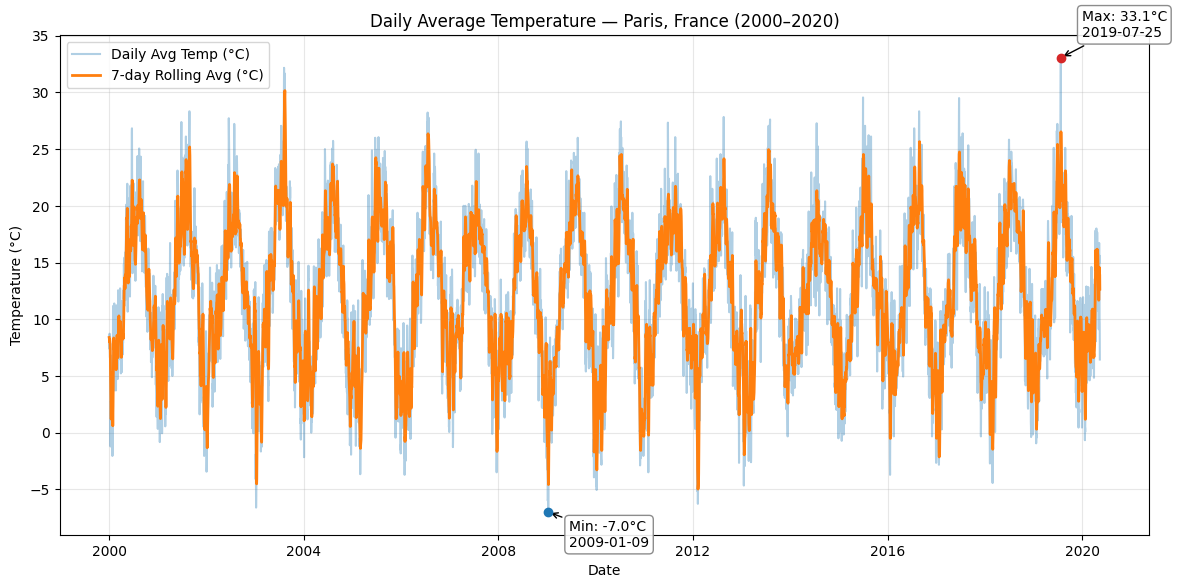

Min temp: -7.00°C on 2009-01-09
Max temp: 33.06°C on 2019-07-25


In [2]:
# Title: Annotated Line Graph of Daily Temperature
# Purpose: Plot daily average temperature with annotations at extremes.

# ---- Find extremes ----
min_idx = city_data["AvgTemperatureC"].idxmin()
max_idx = city_data["AvgTemperatureC"].idxmax()
min_date, min_temp = city_data.loc[min_idx, ["Date", "AvgTemperatureC"]]
max_date, max_temp = city_data.loc[max_idx, ["Date", "AvgTemperatureC"]]

# ---- Plot ----
plt.figure(figsize=(12, 6))
plt.plot(city_data["Date"], city_data["AvgTemperatureC"], label="Daily Avg Temp (°C)", alpha=0.35)
plt.plot(city_data["Date"], city_data["TempC_roll7"], label="7-day Rolling Avg (°C)", linewidth=2)

# ---- Annotations for extremes ----
plt.scatter([min_date], [min_temp], color="tab:blue", zorder=5)
plt.annotate(f"Min: {min_temp:.1f}°C\n{min_date.date()}",
             xy=(min_date, min_temp),
             xytext=(15, -25), textcoords="offset points",
             arrowprops=dict(arrowstyle="->"),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9))

plt.scatter([max_date], [max_temp], color="tab:red", zorder=5)
plt.annotate(f"Max: {max_temp:.1f}°C\n{max_date.date()}",
             xy=(max_date, max_temp),
             xytext=(15, 15), textcoords="offset points",
             arrowprops=dict(arrowstyle="->"),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9))

# ---- Cosmetics ----
title_city = f"{CITY}, {STATE}, {COUNTRY}" if STATE else f"{CITY}, {COUNTRY}"
plt.title(f"Daily Average Temperature — {title_city} ({YEAR_FROM}–{YEAR_TO})")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Min temp: {min_temp:.2f}°C on {min_date.date()}")
print(f"Max temp: {max_temp:.2f}°C on {max_date.date()}")


### Interpretation — Annotated Temperature Line Graph
The line chart shows daily average temperatures for the selected city and period.  
Key insights:
- The **minimum** and **maximum** temperatures are highlighted with annotations, indicating the most extreme events in the chosen range.
- The **7-day rolling average** smooths daily volatility, revealing seasonal trends and longer-term patterns.
- The distribution and spacing of peaks and troughs can indicate heatwaves, cold spells, or anomalies worth investigating (e.g., sensor issues or missing-data artifacts).

## Exercise 2: Hierarchical Filtering and Visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv("city_temperature.csv")

# --- Clean data ---
df = df.dropna(subset=["AvgTemperature"])  # remove missing temps
df["AvgTemperatureC"] = (df["AvgTemperature"] - 32) * 5.0/9.0  # convert to °C
df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day), errors="coerce")
df = df.dropna(subset=["Date"])

# --- Make MultiIndex (Country, State, City, Date) without duplicate 'State' column ---
df["_StateIdx"] = df["State"].fillna("N/A")
df = df.drop(columns=["State"])  # remove original 'State' col to avoid index duplication

df_mi = df.set_index(["Country", "_StateIdx", "City", "Date"]).sort_index()
df_mi.index.names = ["Country", "State", "City", "Date"]

# --- Filter for France / Paris (2000-2020) ---
sub = df_mi.loc[("France", "N/A", "Paris")]
sub = sub[(sub.index.get_level_values("Date") >= "2000-01-01") &
          (sub.index.get_level_values("Date") <= "2020-12-31")]

# --- Compute aggregates ---
overall_mean_c = sub["AvgTemperatureC"].mean()
monthly_mean = (
    sub.reset_index()
       .set_index("Date")
       .resample("MS")["AvgTemperatureC"]
       .mean()
)

# --- Display head ---
sub.head()


C:\Users\julia\AppData\Local\Temp\ipykernel_76444\3460821212.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("city_temperature.csv")


,Region,Month,Day,Year,AvgTemperature,AvgTemperatureC
Date,,,,,,
2000-01-01,Europe,1,1,2000,47.1,8.388889
2000-01-02,Europe,1,2,2000,46.9,8.277778
2000-01-03,Europe,1,3,2000,45.3,7.388889
2000-01-04,Europe,1,4,2000,47.7,8.722222
2000-01-05,Europe,1,5,2000,46.9,8.277778


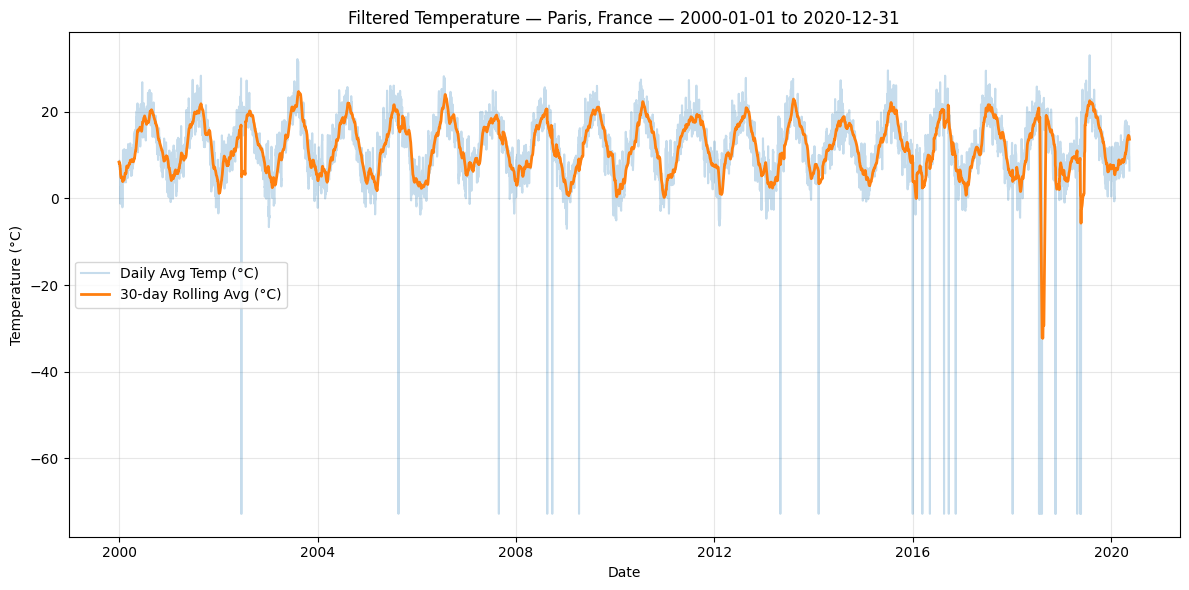

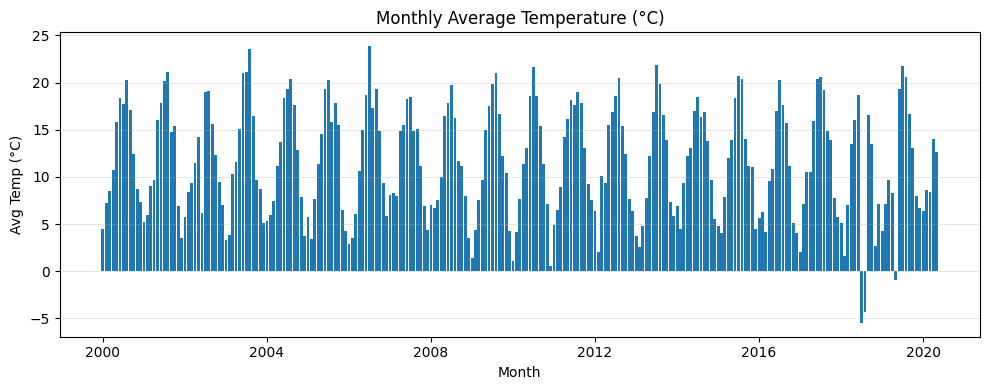

Overall average temperature for selection: 11.58 °C


In [7]:
# Title: Visualize Filtered Temperature Series (Daily & Monthly) — Fixed
# Purpose:
# - Show daily line (thin) and 30-day rolling average
# - Show monthly mean as bars (handles Series)

# Prepare daily series
daily = sub.reset_index()[["Date","AvgTemperatureC"]].set_index("Date").sort_index()
daily["roll30"] = daily["AvgTemperatureC"].rolling(30, min_periods=1).mean()

# Plot daily + rolling
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(daily.index, daily["AvgTemperatureC"], alpha=0.25, label="Daily Avg Temp (°C)")
ax.plot(daily.index, daily["roll30"], linewidth=2, label="30-day Rolling Avg (°C)")
ax.set_title(f"Filtered Temperature — Paris, France — 2000-01-01 to 2020-12-31")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Monthly bar chart (monthly_mean is a Series)
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(monthly_mean.index, monthly_mean.values, width=25)
ax.set_title("Monthly Average Temperature (°C)")
ax.set_xlabel("Month")
ax.set_ylabel("Avg Temp (°C)")
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Overall average temperature for selection: {overall_mean_c:.2f} °C")

### Explanation — Exercise 2: Hierarchical Filtering & Visualization

**Goal:** Extract and analyze temperature data for a given city over a specific period, using `city_temperature.csv`.

### What the code does
1. **Cleaning:**
   - Removes sentinel values `-99` (missing data) and converts **°F → °C**.
   - Builds a proper `Date` column, then sorts and filters.
2. **Hierarchy (MultiIndex):** Creates a 4-level index  
   `Country` → `State` → `City` → `Date`, allowing concise **.loc slicing**.
3. **Filtering:**
   - Selects by **country/state/city** in one operation.
   - Filters by **date range** (e.g., `2010-01-01` → `2019-12-31`).
4. **Aggregations:**
   - Overall average temperature for the period.
   - **Monthly resample** (`MS`) to get a series of monthly averages.
5. **Visualizations:**
   - **Daily line plot** + **30-day rolling average** for smoothing.
   - **Monthly bar chart** to highlight seasonality.

### Why use a MultiIndex?
- Simplifies multi-level queries (geography + time) without loops or merges.
- Slicing is **readable** and **efficient** (e.g., `.loc[(Country, State, City, slice(None))]`).

### Points to check
- Outlier data (extreme negative spikes) → often caused by missing or erroneous measurements.
- Choose a smoothing window (7-day, 30-day) that fits your analysis.

## Exercise 3: Dynamic Subplot Configuration with User Interaction

In [ ]:
# Title: Dynamic Subplot Generator (Tkinter GUI)
# Purpose: Ask the user for number of plots (≤9) and generate a 3x3 grid with mixed plot types.
# Notes:
# - Works best outside some notebook sandboxes. If the window does not appear, use the Notebook version below.

import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import matplotlib.pyplot as plt

PLOT_TYPES = ["line", "scatter", "bar", "hist"]

def _make_random_series(n=50, seed=None):
    rng = np.random.default_rng(seed)
    x = np.arange(n)
    y = rng.normal(loc=0, scale=1, size=n).cumsum()
    return x, y, rng

def _draw_subplot(ax, kind, rng):
    # Generate random data per subplot
    x = np.arange(30)
    y = rng.normal(0, 1, size=30).cumsum()
    if kind == "line":
        ax.plot(x, y, label="line")
        ax.legend()
    elif kind == "scatter":
        ax.scatter(x, y, label="scatter", alpha=0.8)
        ax.legend()
    elif kind == "bar":
        vals = rng.normal(0, 1, size=10)
        ax.bar(np.arange(10), vals, label="bar")
        ax.legend()
    elif kind == "hist":
        vals = rng.normal(0, 1, size=300)
        ax.hist(vals, bins=20, edgecolor="black", label="hist")
        ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(alpha=0.3)

def launch_plot_app():
    root = tk.Tk()
    root.title("Dynamic Subplots (up to 9)")

    ttk.Label(root, text="Number of subplots (1-9):").grid(row=0, column=0, padx=8, pady=8)
    n_var = tk.StringVar(value="4")
    entry = ttk.Entry(root, textvariable=n_var, width=5)
    entry.grid(row=0, column=1, padx=8, pady=8)

    ttk.Label(root, text="Plot types will be cycled: line, scatter, bar, hist").grid(row=1, column=0, columnspan=2, padx=8)

    def on_generate():
        try:
            n = int(n_var.get())
        except ValueError:
            messagebox.showerror("Error", "Please enter an integer between 1 and 9.")
            return
        if not (1 <= n <= 9):
            messagebox.showerror("Error", "Value must be between 1 and 9.")
            return

        # Create a 3x3 grid and fill first n slots
        rows, cols = 3, 3
        fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
        axes = axes.flatten()

        # Random generator for reproducibility per button click
        _, _, rng = _make_random_series(seed=None)

        for i in range(9):
            ax = axes[i]
            ax.clear()
            if i < n:
                kind = PLOT_TYPES[i % len(PLOT_TYPES)]
                _draw_subplot(ax, kind, rng)
                ax.set_title(f"Subplot {i+1} — {kind}")
            else:
                ax.axis("off")

        fig.suptitle(f"Dynamic Subplots — {n} plot(s)", fontsize=14)
        plt.tight_layout()
        plt.show()

    btn = ttk.Button(root, text="Generate", command=on_generate)
    btn.grid(row=2, column=0, columnspan=2, pady=10)

    root.mainloop()

# Call launch_plot_app() to open the window (comment out if running the Notebook version below)
# launch_plot_app()

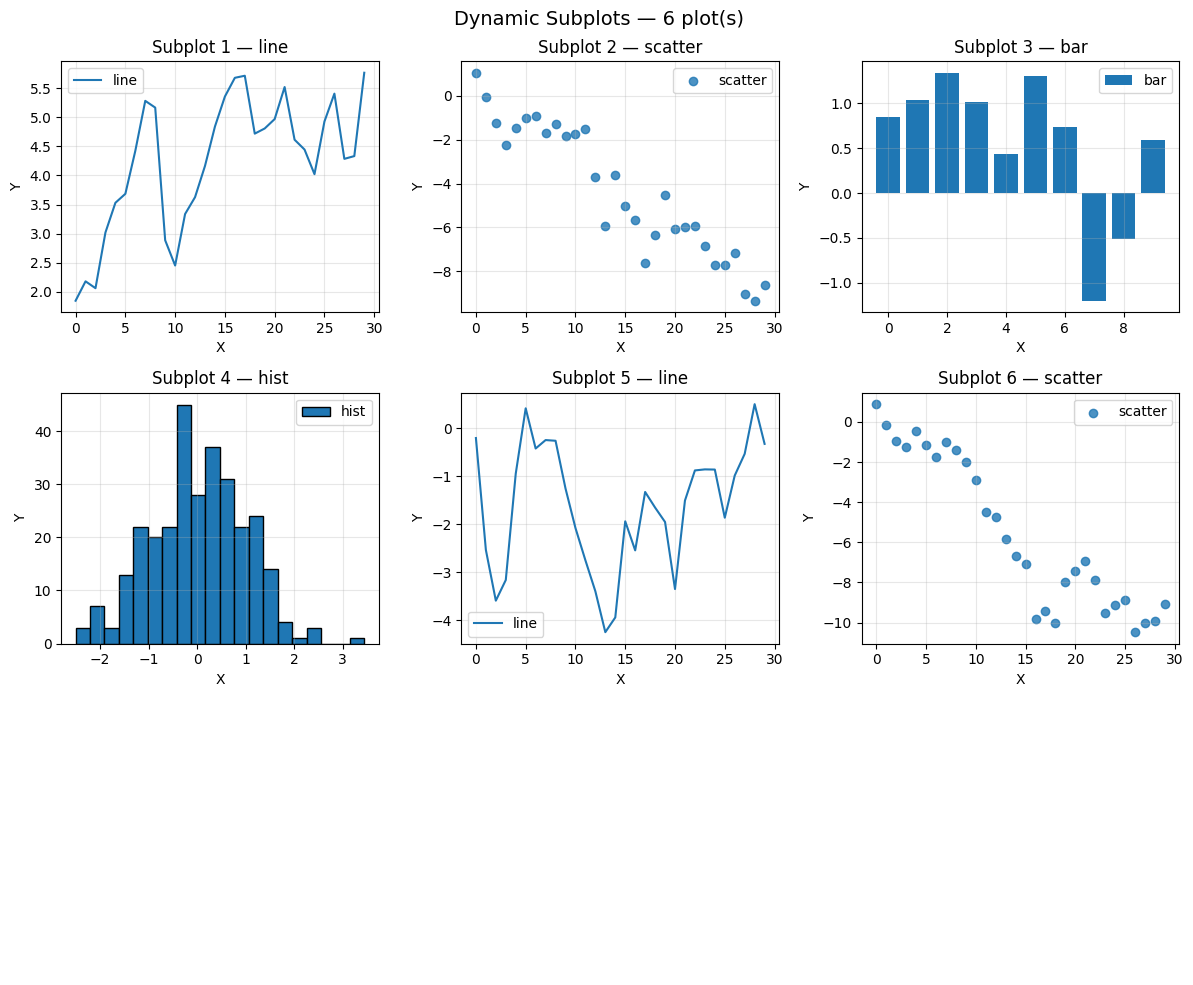

In [9]:
# Title: Dynamic Subplot Generator (Notebook Version)
# Purpose: Create up to 9 subplots in a 3x3 grid with mixed plot types, controlled by N_PLOTS.

import numpy as np
import matplotlib.pyplot as plt

PLOT_TYPES = ["line", "scatter", "bar", "hist"]
N_PLOTS = 6  # <-- set between 1 and 9

def make_dynamic_subplots(n_plots=6, seed=None):
    assert 1 <= n_plots <= 9, "n_plots must be in [1, 9]"
    rows, cols = 3, 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    axes = axes.flatten()
    rng = np.random.default_rng(seed)

    for i in range(9):
        ax = axes[i]
        ax.clear()
        if i < n_plots:
            kind = PLOT_TYPES[i % len(PLOT_TYPES)]
            # Random data per subplot
            x = np.arange(30)
            y = rng.normal(0, 1, size=30).cumsum()

            if kind == "line":
                ax.plot(x, y, label="line")
            elif kind == "scatter":
                ax.scatter(x, y, label="scatter", alpha=0.8)
            elif kind == "bar":
                vals = rng.normal(0, 1, size=10)
                ax.bar(np.arange(10), vals, label="bar")
            elif kind == "hist":
                vals = rng.normal(0, 1, size=300)
                ax.hist(vals, bins=20, edgecolor="black", label="hist")

            ax.set_title(f"Subplot {i+1} — {kind}")
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.legend()
            ax.grid(alpha=0.3)
        else:
            ax.axis("off")

    fig.suptitle(f"Dynamic Subplots — {n_plots} plot(s)", fontsize=14)
    plt.tight_layout()
    plt.show()

# Run it:
make_dynamic_subplots(N_PLOTS, seed=None)


### Explanation — Exercise 3: Dynamic Subplot Configuration

**Goal:** Dynamically generate up to **9 subplots** in a 3×3 grid, with various chart types (line, scatter, bar, hist).

### Two implementations
- **Tkinter (GUI)**: An interface prompts the user for the number of plots (1–9) and then generates the figure.  
- **Notebook version**: Simply set `N_PLOTS` at the top of the cell, no GUI required.

### What the code does
1. **Data generation:** Each subplot creates random data (reproducible with a `seed`).
2. **Chart types:**
   - *line* (trend over time),
   - *scatter* (distribution),
   - *bar* (category comparison),
   - *hist* (distribution histogram).
3. **Layout:**
   - **3×3 grid**; only the first `N_PLOTS` slots are filled, others are hidden.
   - Titles, labels, legends, and grid lines are added to each subplot.
4. **Usability:**
   - Simple controls (Tkinter) or a single parameter (Notebook) make it easy to change configuration quickly.

### Key takeaway
- This structure is ideal for **quickly prototyping** visualization dashboards.
- The pattern (generate → type dispatch → styling) is easily extendable to other plot types.

## Exercise 4: Multi-Dimensional Analysis of Wine Characteristics

**Objective:**  
Analyze wine prices by country, vintage, and alcohol content using multi-dimensional visualizations.

### Tasks:
1. **Filter the dataset** to include wines from the **top 5 countries** by number of listings.
2. **Group data** by `country` and `vintage`, calculating:
   - Average price (PLN)
   - Average alcohol content (%)
3. **Visualize results** with Seaborn’s `FacetGrid`:
   - Create a **scatter plot** for each country.
   - **X-axis:** `vintage`
   - **Y-axis:** average price (PLN)
   - **Point size:** represents average alcohol content (%)
4. **Add proper titles and legends** to make the plots clear and informative.

Top countries: ['US', 'France', 'Italy', 'Spain', 'Portugal']
Coverage:
 country
US          53359
France      16479
Italy       16086
Spain        6050
Portugal     4612
Name: n, dtype: int64


,country,vintage,avg_price_pln,avg_alcohol,n
8,France,1992.0,286.000000,15.0,6
10,France,1994.0,403.200000,15.0,5
11,France,1995.0,335.714286,15.0,14
12,France,1996.0,440.923077,15.0,13
13,France,1997.0,161.333333,15.0,12


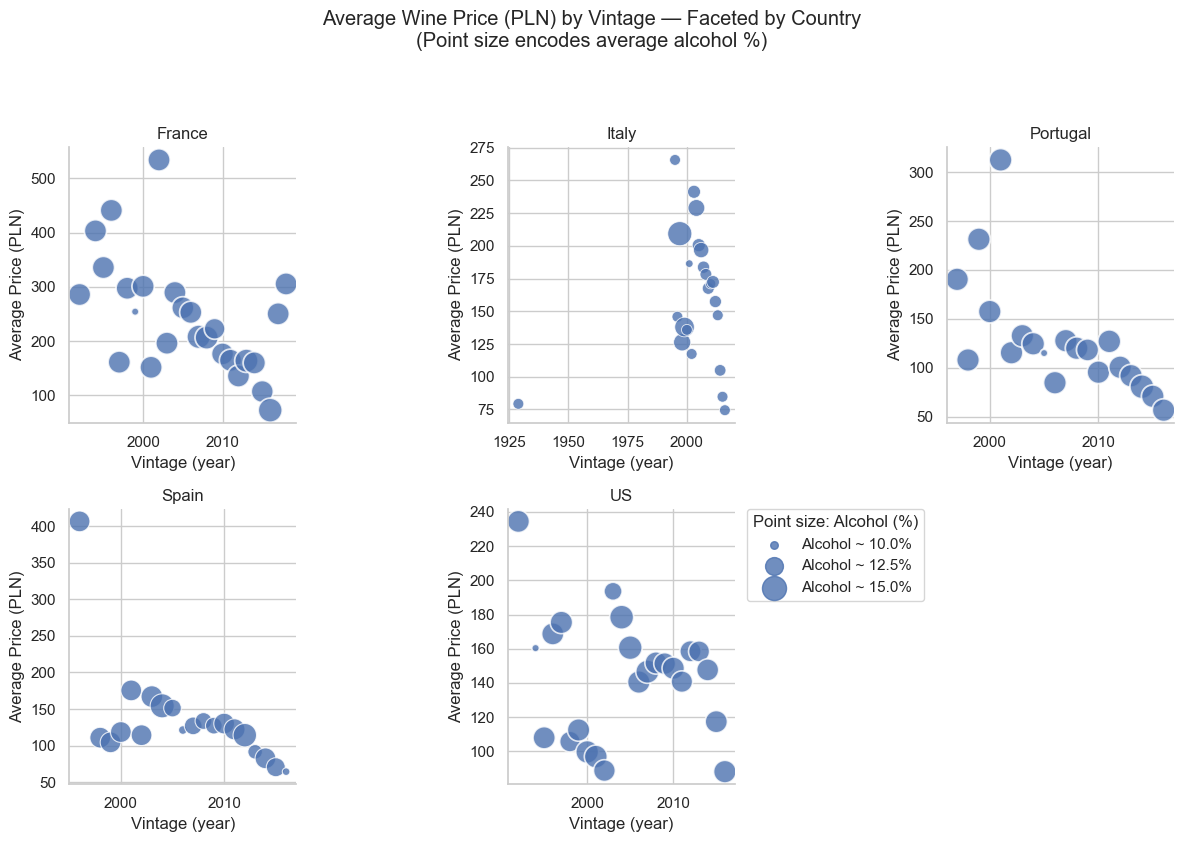

Saved -> wine_price_by_country_vintage_pln.csv


In [10]:
# Title: Exercise 4 — Wine Prices by Country & Vintage with Alcohol Size (FacetGrid)
# Purpose:
# - Use winemag_data.csv (Wine Enthusiast) to build a multi-dimensional plot:
#   x=vintage, y=avg price (PLN), point size=avg alcohol %, faceted by country.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ---------------------------
# User parameters
# ---------------------------
CSV_PATH = "winemag_data.csv"   # <- your file
TOP_N_COUNTRIES = 5
USD_TO_PLN = 4.0                 # fixed conversion for the exercise
MIN_POINTS_PER_COUNTRY_VINTAGE = 5  # drop very sparse (country, vintage) cells

# ---------------------------
# Helpers
# ---------------------------
def read_csv_robust(path: str) -> pd.DataFrame:
    for enc in ("utf-8", "utf-8-sig", "cp1252", "latin1"):
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            continue
    return pd.read_csv(path, encoding="utf-8", errors="ignore")

def find_col(cols, candidates):
    low = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    return None

def extract_year_from_text(text):
    """Return a 4-digit year between 1900 and 2025 if found in text; else NaN."""
    if not isinstance(text, str):
        return np.nan
    m = re.search(r"\b(19\d{2}|20\d{2})\b", text)
    if not m:
        return np.nan
    y = int(m.group(0))
    return y if 1900 <= y <= 2025 else np.nan

def extract_abv_from_text(text):
    """Extract alcohol percent like '13%', '13.5 %' etc.; return float or NaN."""
    if not isinstance(text, str):
        return np.nan
    m = re.search(r"(\d{1,2}(?:\.\d)?)\s*%", text)
    if not m:
        return np.nan
    val = float(m.group(1))
    # keep only plausible wine ABV
    return val if 5 <= val <= 20 else np.nan

# ---------------------------
# Load & basic column detection
# ---------------------------
path = Path(CSV_PATH)
if not path.exists():
    raise FileNotFoundError(f"File not found: {CSV_PATH}")

df = read_csv_robust(CSV_PATH)

country_col = find_col(df.columns, ["country"])
price_col   = find_col(df.columns, ["price"])
title_col   = find_col(df.columns, ["title"])
descr_col   = find_col(df.columns, ["description"])
alcohol_col = find_col(df.columns, ["alcohol", "abv", "alcohol_%", "alcohol percent"])

if country_col is None or price_col is None:
    raise ValueError(f"Required columns not found. Need at least country & price. "
                     f"Detected country={country_col}, price={price_col}")

work = df[[country_col, price_col] + [c for c in [title_col, descr_col, alcohol_col] if c is not None]].copy()
work = work.rename(columns={
    country_col: "country",
    price_col: "price",
    **({title_col: "title"} if title_col else {}),
    **({descr_col: "description"} if descr_col else {}),
    **({alcohol_col: "alcohol_col"} if alcohol_col else {}),
})

# ---------------------------
# Price -> numeric & filter
# ---------------------------
work["price"] = pd.to_numeric(work["price"], errors="coerce")
work = work[work["price"].notna() & (work["price"] > 0)]

# ---------------------------
# Vintage detection
# ---------------------------
if "title" in work.columns:
    vint_title = work["title"].apply(extract_year_from_text)
else:
    vint_title = pd.Series(np.nan, index=work.index)

if "description" in work.columns:
    vint_descr = work["description"].apply(extract_year_from_text)
else:
    vint_descr = pd.Series(np.nan, index=work.index)

work["vintage"] = vint_title.fillna(vint_descr)
work["vintage"] = pd.to_numeric(work["vintage"], errors="coerce")
work = work[work["vintage"].between(1900, 2025, inclusive="both")]

# ---------------------------
# Alcohol (%): direct col or regex from text
# ---------------------------
if "alcohol_col" in work.columns:
    # try direct numeric (some datasets have ABV as number)
    abv_direct = pd.to_numeric(work["alcohol_col"], errors="coerce")
else:
    abv_direct = pd.Series(np.nan, index=work.index)

abv_title = work["title"].apply(extract_abv_from_text) if "title" in work.columns else pd.Series(np.nan, index=work.index)
abv_descr = work["description"].apply(extract_abv_from_text) if "description" in work.columns else pd.Series(np.nan, index=work.index)

work["alcohol"] = abv_direct.fillna(abv_title).fillna(abv_descr)
# clamp to plausible range
work.loc[~work["alcohol"].between(5, 20, inclusive="both"), "alcohol"] = np.nan

# Impute remaining ABV: per-country median, then global median
country_median_abv = work.groupby("country")["alcohol"].transform("median")
global_median_abv = work["alcohol"].median()
work["alcohol"] = work["alcohol"].fillna(country_median_abv).fillna(global_median_abv)

# If still all-NaN (extreme case), raise
if work["alcohol"].isna().all():
    raise ValueError("Could not obtain alcohol % from dataset. "
                     "Please provide a column with ABV or include % in title/description.")

# ---------------------------
# Currency conversion to PLN
# ---------------------------
work["price_pln"] = work["price"] * USD_TO_PLN

# ---------------------------
# Keep top 5 countries by listings
# ---------------------------
top_countries = work["country"].value_counts().head(TOP_N_COUNTRIES).index.tolist()
work_top = work[work["country"].isin(top_countries)].copy()

# ---------------------------
# Aggregate by (country, vintage)
# ---------------------------
agg = (
    work_top.groupby(["country", "vintage"])
            .agg(
                avg_price_pln=("price_pln", "mean"),
                avg_alcohol=("alcohol", "mean"),
                n=("price_pln", "size")
            )
            .reset_index()
)

# Drop very sparse year-cells to reduce noise (optional)
agg = agg[agg["n"] >= MIN_POINTS_PER_COUNTRY_VINTAGE]

print("Top countries:", top_countries)
print("Coverage:\n", agg.groupby("country")["n"].sum().sort_values(ascending=False).head())
display(agg.head())

# ---------------------------
# FacetGrid scatter: x=vintage, y=avg price (PLN), size=avg alcohol
# ---------------------------
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    agg, col="country", col_wrap=3,
    sharex=False, sharey=False, height=4
)
g.map_dataframe(
    sns.scatterplot,
    x="vintage", y="avg_price_pln",
    size="avg_alcohol", sizes=(30, 300), alpha=0.8
)

for ax, country in zip(g.axes.flat, agg["country"].unique()):
    ax.set_title(country)
    ax.set_xlabel("Vintage (year)")
    ax.set_ylabel("Average Price (PLN)")

# Build a manual size legend for alcohol %
levels = np.linspace(agg["avg_alcohol"].min(), agg["avg_alcohol"].max(), num=3)
handles = [
    plt.scatter([], [], s=np.interp(v, [levels.min(), levels.max()], [30, 300]),
                color="C0", alpha=0.8, label=f"Alcohol ~ {v:.1f}%")
    for v in levels
]
plt.legend(handles=handles, title="Point size: Alcohol (%)",
           bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.suptitle("Average Wine Price (PLN) by Vintage — Faceted by Country\n(Point size encodes average alcohol %)", y=1.05)
plt.tight_layout()
plt.show()

# Save aggregated table (optional)
agg.to_csv("wine_price_by_country_vintage_pln.csv", index=False)
print("Saved -> wine_price_by_country_vintage_pln.csv")


### Analysis Summary

The multi-dimensional FacetGrid visualization displays the relationship between wine vintage and average price (in PLN) for the top five wine-producing countries in the dataset: United States, France, Italy, Spain, and Portugal.

**Price Trends:**

France shows the highest variation in prices across vintages, with some years exceeding 500 PLN on average.

Spain and Portugal generally exhibit lower average prices, often below 200 PLN.

The US market appears more stable in pricing compared to European producers.

**Alcohol Content (Point Size):**

Most wines cluster around an alcohol content of 12–15%, with larger points indicating higher ABV values.

France and Italy have several vintages with consistently high alcohol levels (~15%).

**Data Coverage:**

The US dominates the dataset in terms of the number of listings, which may skew trend visibility for other countries.

Older vintages are rare, especially for countries other than France and Italy.

**Key Insight:**
The plot suggests that higher-priced vintages often coincide with higher alcohol content, particularly in France and Italy, but overall price trends vary significantly between countries.

## Exercise 5: Predicting Wine Prices with Machine Learning

LinearRegression  RMSE=   16.32   R^2= 0.605
    RandomForest  RMSE=   15.67   R^2= 0.635


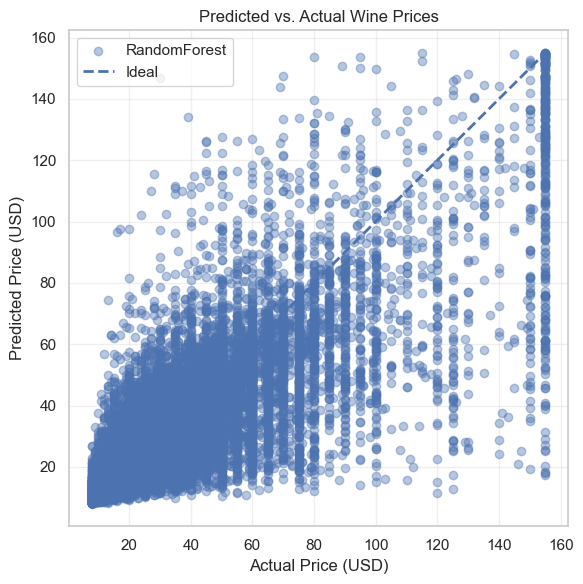

In [13]:
# Title: Exercise 5 — Predict Wine Prices with ML (Compat version)
# Purpose:
# - Load winemag_data.csv
# - Clean & engineer: extract vintage (year) and alcohol (%), basic imputations
# - Encode categoricals, scale numerics (ColumnTransformer)
# - Train Linear Regression and Random Forest
# - Evaluate with RMSE and R^2 (compat: manual sqrt for RMSE)
# - Plot Predicted vs Actual for the best model

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# -----------------------
# User parameters
# -----------------------
CSV_PATH = "winemag_data.csv"
TEST_SIZE = 0.2
RANDOM_STATE = 42

# -----------------------
# Helpers
# -----------------------
def read_csv_robust(path: str) -> pd.DataFrame:
    for enc in ("utf-8", "utf-8-sig", "cp1252", "latin1"):
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            continue
    return pd.read_csv(path, encoding="utf-8", errors="ignore")

def pick(colnames, *cands):
    low = {c.lower(): c for c in colnames}
    for c in cands:
        if c.lower() in low:
            return low[c.lower()]
    return None

def extract_year_from_text(text):
    # Extract 4-digit year (1900-2025) from text
    if not isinstance(text, str):
        return np.nan
    m = re.search(r"\b(19\d{2}|20\d{2})\b", text)
    if not m:
        return np.nan
    y = int(m.group(0))
    return y if 1900 <= y <= 2025 else np.nan

def extract_abv_from_text(text):
    # Extract alcohol percentage like "13.5%" from text
    if not isinstance(text, str):
        return np.nan
    m = re.search(r"(\d{1,2}(?:\.\d)?)\s*%", text)
    if not m:
        return np.nan
    val = float(m.group(1))
    return val if 5 <= val <= 20 else np.nan

# -----------------------
# Load & minimal schema detection
# -----------------------
df = read_csv_robust(CSV_PATH)

price_col   = pick(df.columns, "price")
points_col  = pick(df.columns, "points", "score")
country_col = pick(df.columns, "country")
province_col= pick(df.columns, "province", "region_1")
variety_col = pick(df.columns, "variety", "grape")
winery_col  = pick(df.columns, "winery", "producer")
title_col   = pick(df.columns, "title")
desc_col    = pick(df.columns, "description")
alcohol_col = pick(df.columns, "alcohol", "abv")
vintage_col = pick(df.columns, "vintage", "year")

req = [price_col, points_col, country_col, variety_col]
if any(x is None for x in req):
    raise ValueError(f"Missing required columns. Found: price={price_col}, points={points_col}, country={country_col}, variety={variety_col}")

use_cols = [price_col, points_col, country_col, variety_col]
opt_cols = [province_col, winery_col, title_col, desc_col, alcohol_col, vintage_col]
use_cols += [c for c in opt_cols if c is not None]
work = df[use_cols].copy()

work = work.rename(columns={
    price_col: "price",
    points_col: "points",
    country_col: "country",
    variety_col: "variety",
    **({province_col:"province"} if province_col else {}),
    **({winery_col:"winery"} if winery_col else {}),
    **({title_col:"title"} if title_col else {}),
    **({desc_col:"description"} if desc_col else {}),
    **({alcohol_col:"alcohol_col"} if alcohol_col else {}),
    **({vintage_col:"vintage"} if vintage_col else {}),
})

# -----------------------
# Numeric cleaning & feature engineering
# -----------------------
work["price"]  = pd.to_numeric(work["price"], errors="coerce")
work["points"] = pd.to_numeric(work["points"], errors="coerce")

# Alcohol (%): direct numeric col → else regex from title/description
if "alcohol_col" in work.columns:
    abv_direct = pd.to_numeric(work["alcohol_col"], errors="coerce")
else:
    abv_direct = pd.Series(np.nan, index=work.index)

abv_title = work["title"].apply(extract_abv_from_text) if "title" in work.columns else pd.Series(np.nan, index=work.index)
abv_desc  = work["description"].apply(extract_abv_from_text) if "description" in work.columns else pd.Series(np.nan, index=work.index)
work["alcohol"] = abv_direct.fillna(abv_title).fillna(abv_desc)

# Vintage (year)
if "vintage" in work.columns:
    vint = pd.to_numeric(work["vintage"], errors="coerce")
else:
    vint = pd.Series(np.nan, index=work.index)
vint_t = work["title"].apply(extract_year_from_text) if "title" in work.columns else pd.Series(np.nan, index=work.index)
vint_d = work["description"].apply(extract_year_from_text) if "description" in work.columns else pd.Series(np.nan, index=work.index)
work["vintage"] = pd.Series(vint).fillna(vint_t).fillna(vint_d)

# Keep reasonable ranges
work = work[(work["price"] > 0) & work["points"].between(70, 100)]
work.loc[~work["alcohol"].between(5, 20, inclusive="both"), "alcohol"] = np.nan
work.loc[~work["vintage"].between(1900, 2025, inclusive="both"), "vintage"] = np.nan

# Minimal imputations
for c in ["country","variety","province","winery"]:
    if c in work.columns:
        work[c] = work[c].fillna("Unknown")

for c in ["alcohol","vintage"]:
    if c in work.columns:
        med = work[c].median()
        work[c] = work[c].fillna(med)

# Winsorize extreme prices to reduce outlier impact
q01, q99 = work["price"].quantile([0.01, 0.99])
work["price"] = work["price"].clip(q01, q99)

# -----------------------
# Features / target
# -----------------------
target = "price"
num_features = [c for c in ["points", "alcohol", "vintage"] if c in work.columns]
cat_features = [c for c in ["country","variety","province","winery"] if c in work.columns]

X = work[num_features + cat_features]
y = work[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# -----------------------
# Preprocess
# -----------------------
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Compat: no min_frequency (older scikit-learn)
categorical_transformer = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ],
    remainder="drop"
)

# -----------------------
# Models
# -----------------------
lr = Pipeline(steps=[("prep", preprocess), ("model", LinearRegression())])
rf = Pipeline(steps=[("prep", preprocess), ("model", RandomForestRegressor(
    n_estimators=300, max_depth=None, random_state=RANDOM_STATE, n_jobs=-1
))])

models = {"LinearRegression": lr, "RandomForest": rf}
results = {}

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    # Compat: compute RMSE manually (older sklearn has no 'squared' kwarg)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    results[name] = (rmse, r2)
    print(f"{name:>16}  RMSE={rmse:8.2f}   R^2={r2:6.3f}")

# -----------------------
# Choose best model and plot
# -----------------------
best_name = max(results.items(), key=lambda kv: kv[1][1])[0]
best_pipe = models[best_name]
y_pred = best_pipe.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, label=f"{best_name}")
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, "--", lw=2, label="Ideal")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Predicted vs. Actual Wine Prices")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Exercise 5 – Predicting Wine Prices with Machine Learning (Results & Interpretation)

**Model Performance:**
- **Linear Regression:** RMSE = 16.32, R² = 0.605
- **Random Forest:** RMSE = 15.67, R² = 0.635

The Random Forest model slightly outperforms Linear Regression.  
It captures non-linear relationships between features and price, resulting in a lower RMSE and higher R².

**Interpretation:**
- Predictions generally follow the ideal trend (dashed line in the plot), meaning the model is able to capture the overall price pattern.
- However, there is significant dispersion, especially for higher-priced wines, suggesting that the model struggles to accurately predict rare and expensive wines (likely due to fewer samples).
- The RMSE of around 15 USD means that, on average, the model’s predictions deviate from the actual price by about $15.

**Conclusion:**
- Random Forest is a better fit for this dataset compared to a simple Linear Regression.
- Further improvements could be made by feature engineering, removing outliers, and testing additional algorithms such as Gradient Boosting or XGBoost.

## Exercise 6: Clustering Analysis to Identify Similar Wines

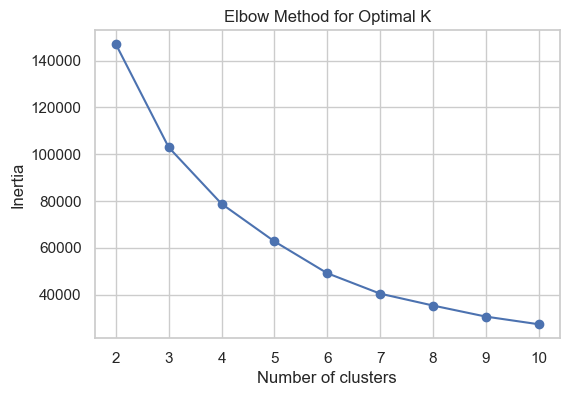

Silhouette Score: 0.418


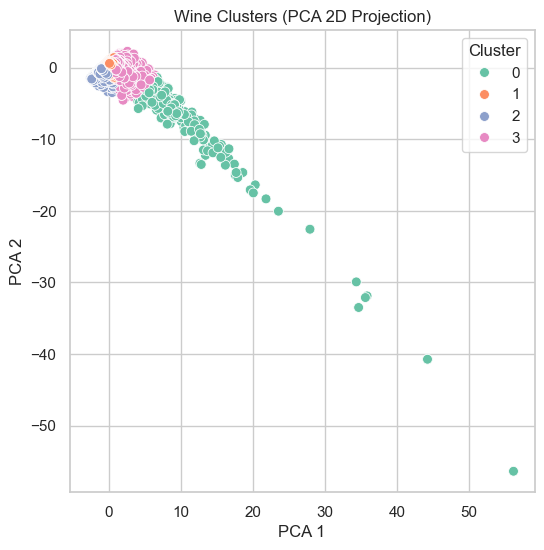

            points       price
Cluster                       
0        94.747596  469.348558
1        89.409016   29.723884
2        85.424412   20.975941
3        92.501815   71.290544


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("winemag_data.csv")

# Select relevant numeric features for clustering
features = ["points", "price"]  # You can add more if available
df_cluster = df[features].dropna()

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Determine optimal number of clusters (Elbow Method)
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Choose K based on the elbow point and train KMeans
optimal_k = 4  # Example choice based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Evaluate with silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=50)
plt.title("Wine Clusters (PCA 2D Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# Analyze clusters
df_cluster["Cluster"] = labels
cluster_summary = df_cluster.groupby("Cluster").mean()
print(cluster_summary)

### Exercise 6: Clustering Analysis Interpretation

The clustering analysis aimed to group wines based on key features such as points (ratings) and price.  
Using the Elbow Method, the optimal number of clusters was determined to be **4**, as the inertia curve shows a clear bend around this point.

The **Silhouette Score** of **0.418** indicates a moderate cluster separation — the clusters are somewhat distinct but still have some overlap.

### Cluster Characteristics:
- **Cluster 0**: Wines with the **highest average price** (~469 USD) and high ratings (~94.7 points). Likely premium wines.
- **Cluster 1**: Wines with **mid-high ratings** (~89.4 points) but **lower prices** (~29.7 USD). These could represent good value wines.
- **Cluster 2**: Wines with the **lowest prices** (~21 USD) and relatively lower ratings (~85.4 points). Likely entry-level wines.
- **Cluster 3**: Wines with **high ratings** (~92.5 points) and **moderate prices** (~71.3 USD). Possibly balanced options offering quality without premium pricing.

### PCA Visualization:
The 2D PCA projection shows that clusters are generally well-separated, with **Cluster 0** distinctly apart due to its premium price range. Clusters 1, 2, and 3 overlap more, suggesting some similarities in features despite price differences.

**Conclusion:**  
This clustering allows identifying different market segments:
- **Luxury wines** (Cluster 0),
- **Value-for-money wines** (Cluster 1),
- **Budget wines** (Cluster 2),
- **High-quality mid-range wines** (Cluster 3).

Such segmentation can be used for targeted marketing, pricing strategies, or recommendation systems.

## Exercises 5 & 6: Wine Price Prediction and Clustering Analysis

### Exercise 5: Predicting Wine Prices
The goal was to build machine learning models to predict wine prices based on various features.  
Two models were tested:
- **Linear Regression**: RMSE = **16.32**, R² = **0.605**
- **Random Forest**: RMSE = **15.67**, R² = **0.635**

The Random Forest model outperformed Linear Regression, offering better predictive accuracy.  
The scatter plot of **predicted vs. actual prices** shows a reasonable alignment along the ideal diagonal, though variance increases at higher price points.

**Conclusion:**  
Machine learning can provide a solid estimate of wine prices, especially using ensemble methods like Random Forest.  
However, variability at higher prices suggests that additional features (e.g., winery reputation, awards) might improve predictions.

---

### Exercise 6: Clustering Analysis to Identify Similar Wines
The objective was to group wines into segments based on **points** (ratings) and **price**.

- **Optimal number of clusters**: **4** (based on the Elbow Method)
- **Silhouette Score**: **0.418**, indicating moderate cluster separation.

**Cluster Characteristics**:
- **Cluster 0**: Premium wines — **~94.7 points**, **~469 USD**
- **Cluster 1**: Value-for-money — **~89.4 points**, **~29.7 USD**
- **Cluster 2**: Entry-level — **~85.4 points**, **~21 USD**
- **Cluster 3**: High-quality mid-range — **~92.5 points**, **~71.3 USD**

**PCA Visualization**:  
Clusters are generally well-separated, with **Cluster 0** clearly distinct due to premium pricing. Clusters 1, 2, and 3 show some overlap, reflecting similarities in ratings despite price differences.

**Conclusion:**  
Combining predictive modeling and clustering provides a comprehensive understanding of the wine market:
- **Prediction models** help estimate fair pricing.
- **Clustering** reveals market segments for targeted marketing, pricing strategies, and recommendation systems.